# KNN and Decision Tree: Classification and Regression

### AIM:
Perform regression and classification on the given datasets using KNN and Decision Tree algorithms.

### Tasks:
- Import the dataset using pandas
- Perform Classification using KNN algorithm
- Perform Classification using Decision Trees
- Perform Regression using KNN algorithm and predict the price of diamonds
- Perform Regression using Decision Trees algorithm and predict the price of diamonds


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
%matplotlib inline

## 1. Import the Dataset

Load your local dataset (e.g., `diamonds.csv`) located in the same directory as this notebook.

In [3]:
# Load dataset from local file
diamonds = pd.read_csv('diamonds.csv')  # Make sure this file is in your working directory
diamonds.dropna(inplace=True)
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Exploratory Data Analysis (EDA)

In [4]:
# Basic EDA
print("Dataset Shape:", diamonds.shape)
print("\nDataset Info:")
print(diamonds.info())
print("\nSummary Statistics:")
print(diamonds.describe())

# Check for null values
print("\nMissing Values:\n", diamonds.isnull().sum())

Dataset Shape: (53940, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None

Summary Statistics:
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.7

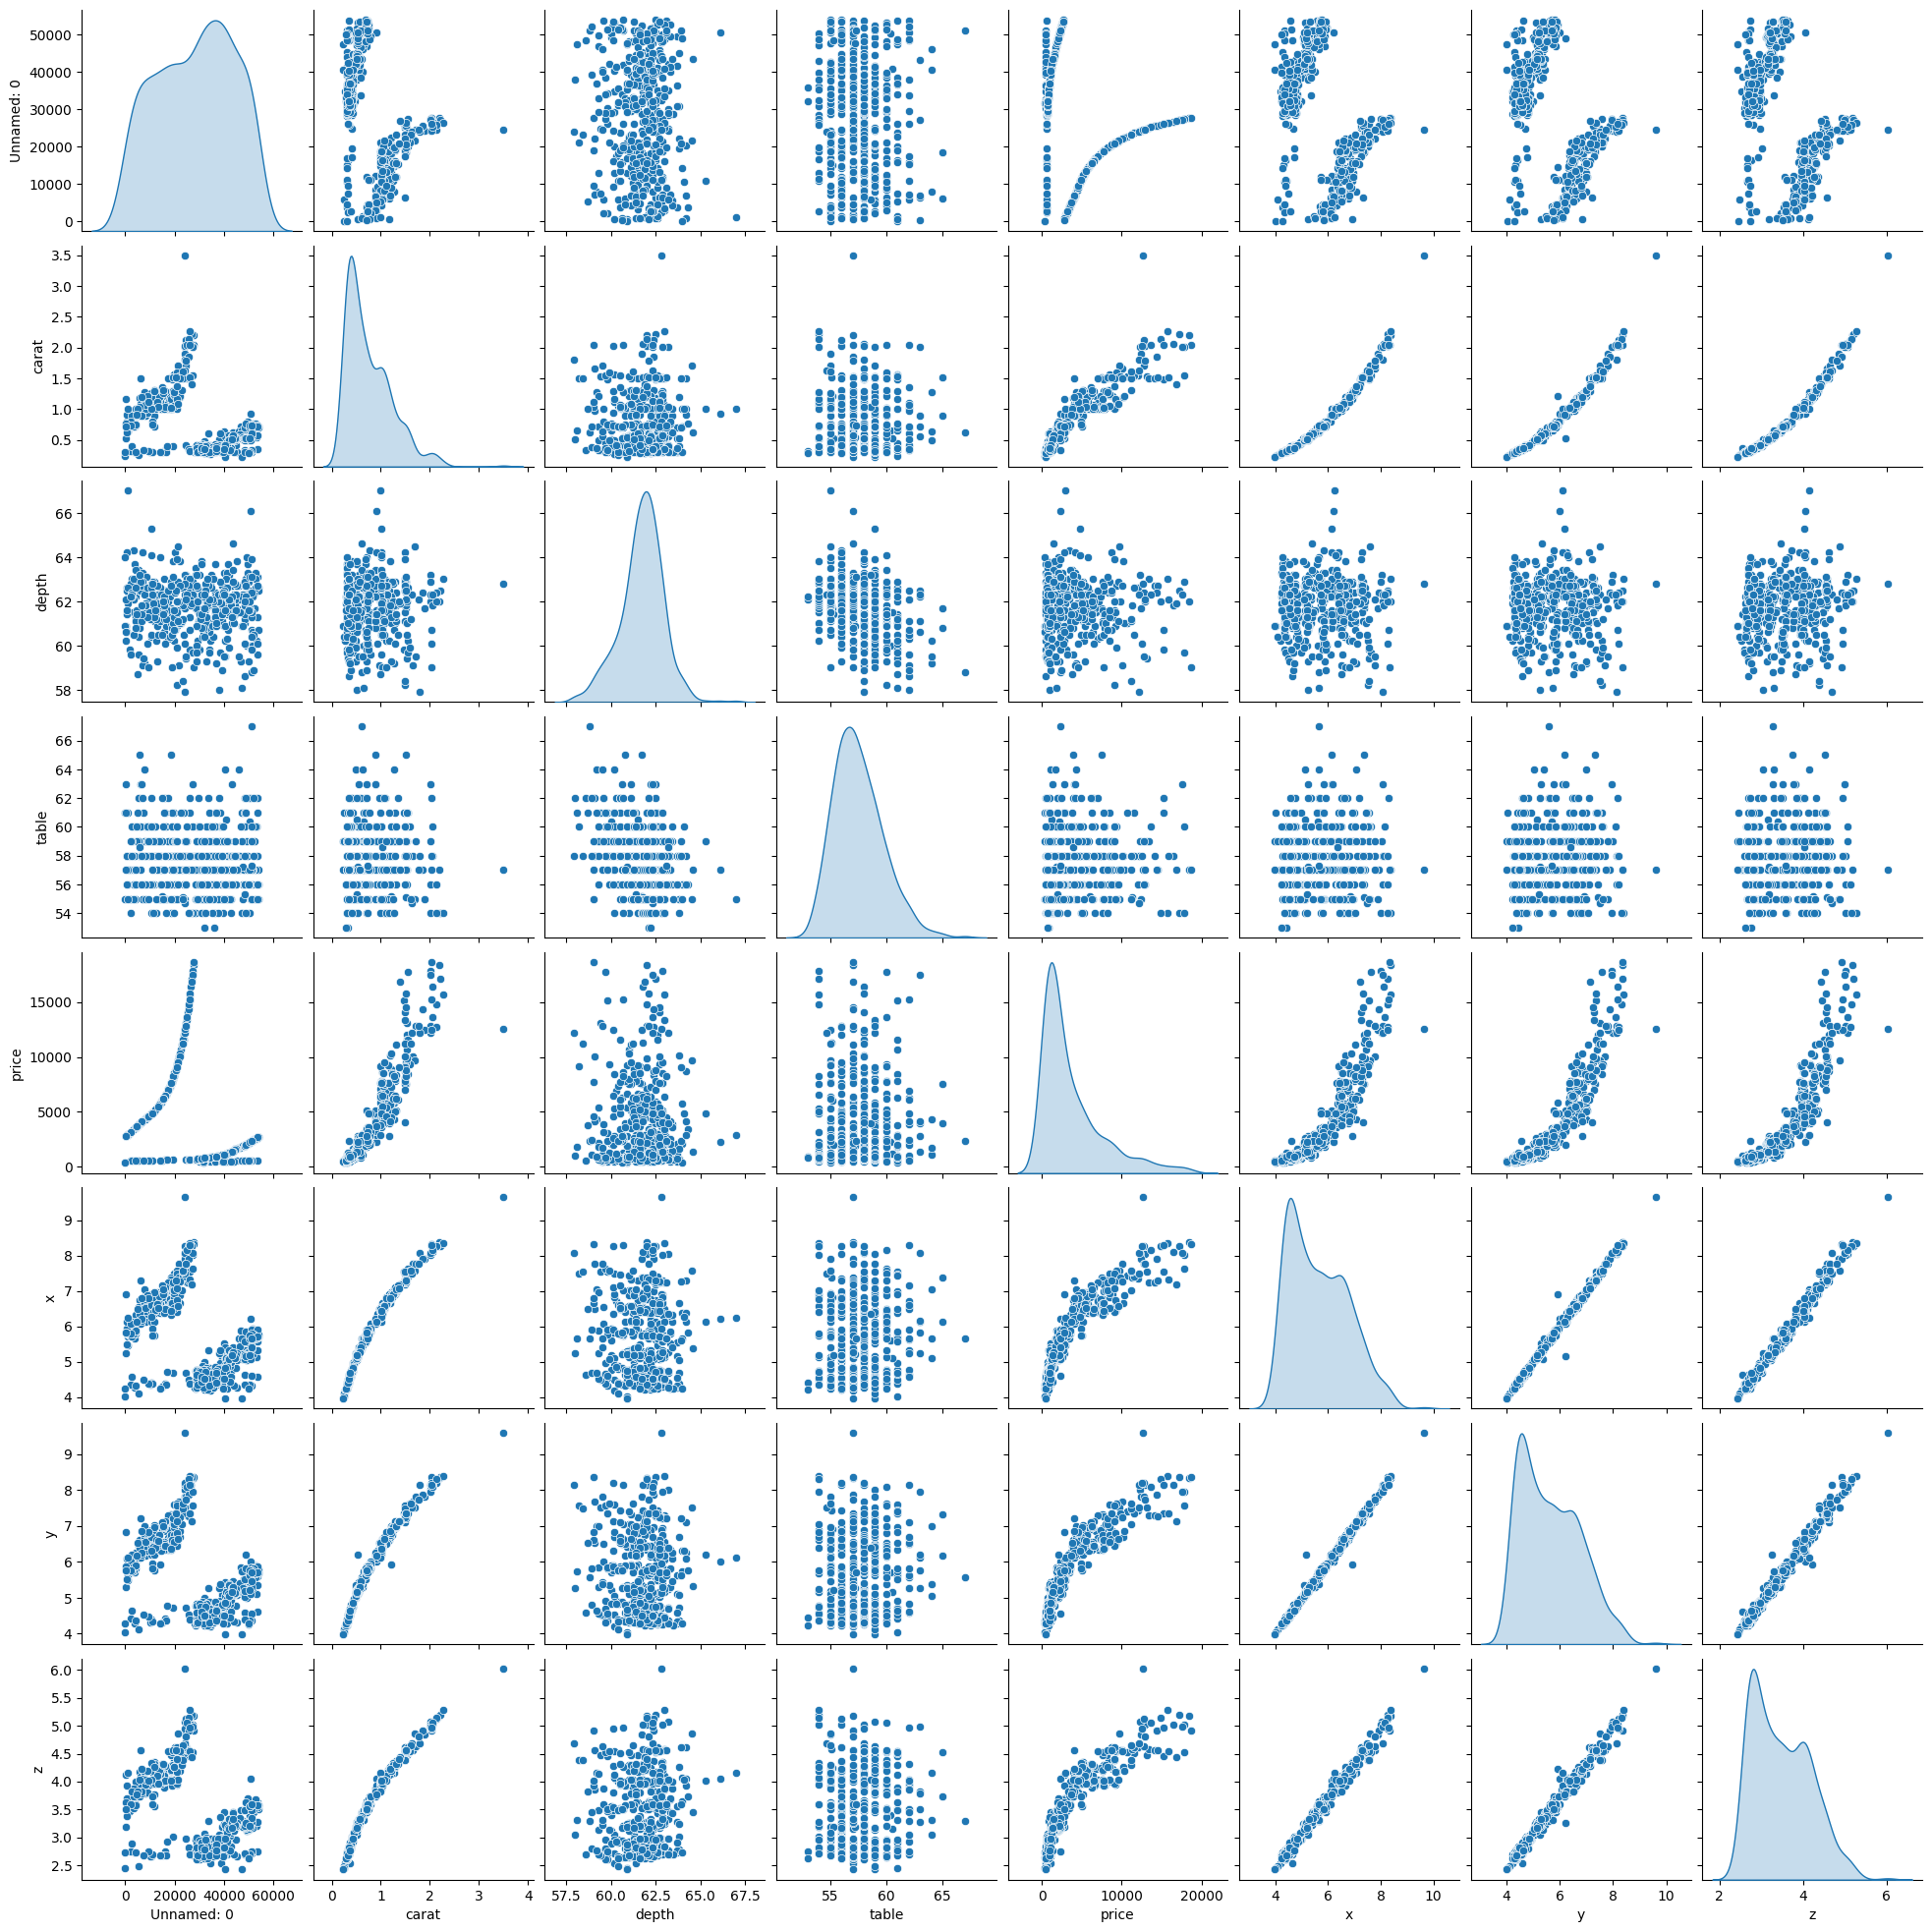

In [5]:
# Pairplot to visualize relationships
sns.pairplot(diamonds.sample(500), diag_kind='kde')  # use a subset for speed
plt.show()

### Preprocess categorical variables
We'll encode the categorical features using LabelEncoder.

In [6]:
# Encode categorical features
label_encoders = {}
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    le = LabelEncoder()
    diamonds[col] = le.fit_transform(diamonds[col])
    label_encoders[col] = le

diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


## 2. Classification using KNN
We'll use `cut` as the target class for classification.

In [7]:
# Features and target for classification
X = diamonds.drop(['cut', 'price'], axis=1)
y = diamonds['cut']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)

# Results
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Classifier Accuracy: 0.6718576195773082
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       335
           1       0.54      0.52      0.53      1004
           2       0.77      0.91      0.83      4292
           3       0.64      0.70      0.67      2775
           4       0.45      0.27      0.34      2382

    accuracy                           0.67     10788
   macro avg       0.65      0.63      0.63     10788
weighted avg       0.65      0.67      0.65     10788



## 3. Classification using Decision Trees

In [8]:
# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Results
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Classifier Accuracy: 0.7110678531701891
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       335
           1       0.67      0.68      0.68      1004
           2       0.80      0.79      0.79      4292
           3       0.74      0.74      0.74      2775
           4       0.52      0.54      0.53      2382

    accuracy                           0.71     10788
   macro avg       0.71      0.72      0.71     10788
weighted avg       0.71      0.71      0.71     10788



## 4. Regression using KNN (Predict Diamond Prices)

In [9]:
# Features and target for regression
X_reg = diamonds.drop('price', axis=1)
y_reg = diamonds['price']

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scale features
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_r_scaled, y_train_r)
y_pred_knn_r = knn_reg.predict(X_test_r_scaled)

# Results
print("KNN Regression RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_knn_r)))
print("KNN Regression R2 Score:", r2_score(y_test_r, y_pred_knn_r))

KNN Regression RMSE: 664.8936810223148
KNN Regression R2 Score: 0.9721904401820922


## 5. Regression using Decision Tree (Predict Diamond Prices)

In [10]:
# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_r, y_train_r)
y_pred_tree_r = tree_reg.predict(X_test_r)

# Results
print("Decision Tree Regression RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_tree_r)))
print("Decision Tree Regression R2 Score:", r2_score(y_test_r, y_pred_tree_r))

Decision Tree Regression RMSE: 22.952648295448707
Decision Tree Regression R2 Score: 0.9999668597860654
